In [3]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [4]:
iris = load_iris()

In [10]:
X = iris.data
y = iris.target

In [11]:
X.shape

(150, 4)

<Axes: >

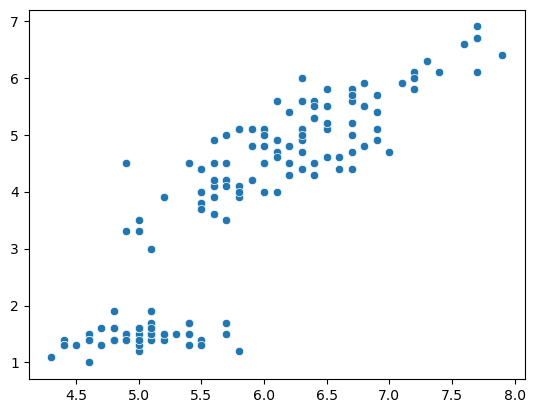

In [12]:
# Visualize
sns.scatterplot(x=X[:,0], y=X[:,2])

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# optional - dimensionality reduciton using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(X_scaled)

In [16]:
# Elbow method
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

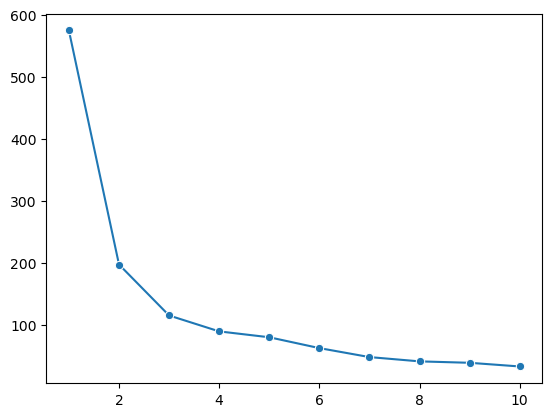

In [17]:
sns.lineplot(x=range(1, 11), y=wcss, marker='o')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

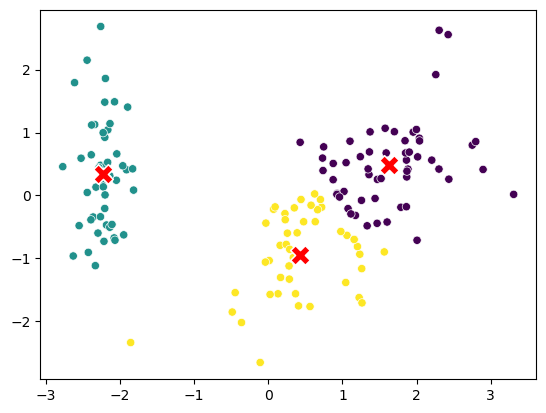

In [18]:
kmeans = KMeans(n_clusters=3, random_state=10)
labels = kmeans.fit_predict(pca_data)

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:,1], c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200)